#Régression Linéaire Simple avec Numpy



In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

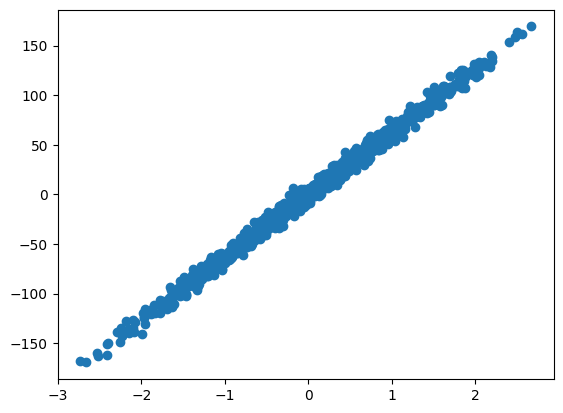

In [ ]:
x, y = make_regression(n_samples=1000, n_features=1, noise=5)
plt.scatter(x, y) # afficher les résultats.

In [ ]:
print(x.shape)
print(y.shape)

(1000, 1)
(1000,)


In [ ]:
# redimensionner y. On remarque que n'y a pas les dimensions(100,1)
# on corrige le problème avec np.reshape
y = y.reshape(y.shape[0], 1)
print(y.shape)

(1000, 1)


In [ ]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
X

(1000, 2)


array([[-0.13134505,  1.        ],
       [ 1.57420027,  1.        ],
       [ 2.18630126,  1.        ],
       ...,
       [ 0.13736217,  1.        ],
       [-0.48750964,  1.        ],
       [-0.60616843,  1.        ]])

In [ ]:
theta = np.random.randn(2, 1)
theta

array([[0.54170919],
       [0.0453928 ]])

2. Modèle Linéaire

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

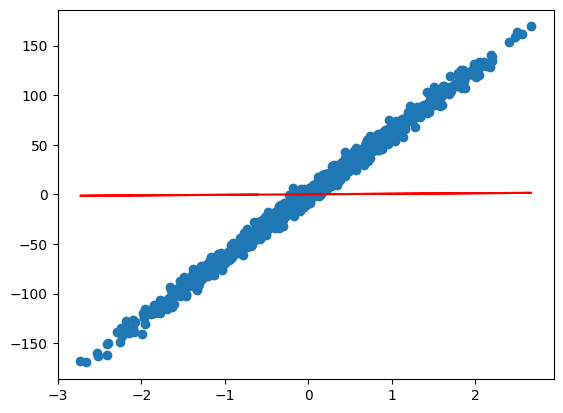

In [ ]:
def model(X, theta):
    return X.dot(theta)
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

3. Fonction Cout

In [ ]:
cost_function(X, y, theta)

1944.9375857722684

 4. Gradients et Descente de Gradient

In [ ]:
def grad(X, y, theta):
    m = len(y)
    XT = np.transpose(X)
    return 1/m * XT.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)# création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)# mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta)# on enregistre la valeur du Cout au tour i dans cost_history[i]
    return theta, cost_history

5. Phase d'entrainement

In [ ]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=400)

In [ ]:
theta_final# voici les parametres du modele une fois que la machine a été entrainée

array([[31.39069671],
       [-0.18368681]])

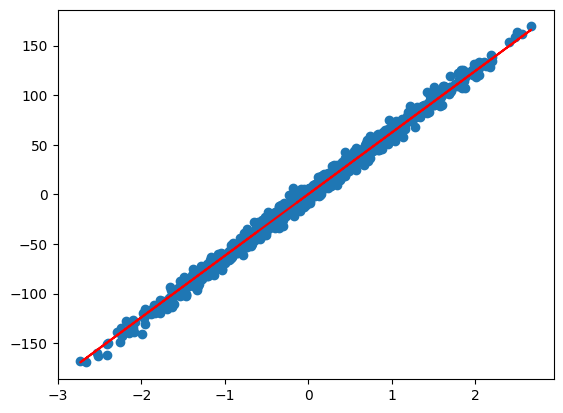

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

6. Courbes d'apprentissage

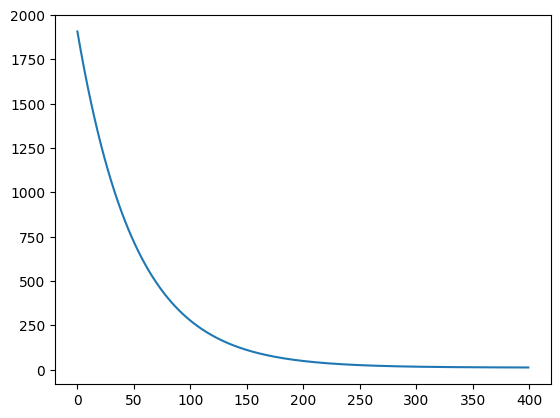

In [ ]:
plt.plot(range(400), cost_history)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

7. Evaluation finale

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

0.9755274033673896